In [1]:
import  pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [14]:
raw_data = pd.read_csv("countries.csv") 


In [15]:
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


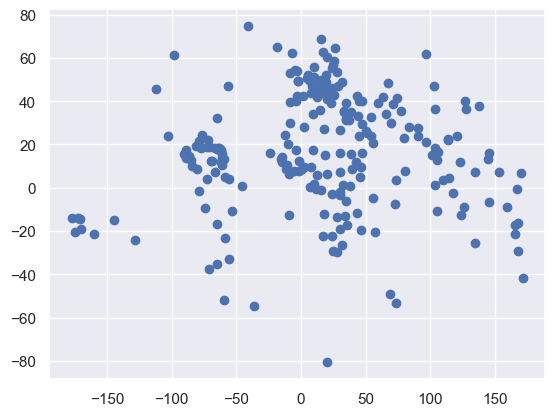

In [16]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])


In [17]:
cluster_data  = raw_data.iloc[:,[1,2]]

In [18]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [19]:
ss =StandardScaler()
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude','Latitude'])


In [20]:
kmean = KMeans(4)

In [21]:
kmean.fit(cluster_data)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [24]:
identified_clusters = kmean.fit_predict(cluster_data)

In [25]:
identified_clusters

array([1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 3, 2, 3, 1, 2, 0, 0, 3, 0, 3, 3,
       2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 0, 1, 0, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 3,
       0, 0, 3, 0, 2, 3, 0, 0, 2, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 1, 0, 1,
       2, 1, 2, 3, 1, 0, 1, 0, 2, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 0, 3, 0, 2, 1, 1, 2, 0, 0, 2, 0, 3, 0, 1, 0, 2, 3, 0, 0, 0,
       2, 1, 0, 0, 0, 3, 2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 3, 0, 1, 3, 3, 2,
       3, 2, 3, 2, 3, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3, 2, 3, 3, 2, 3, 1, 0, 3,
       3, 0, 0, 3, 1, 0, 0, 0, 3, 1, 3, 0, 1, 3, 3, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 3, 3, 0, 3, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 3, 3],
      dtype=int32)

In [27]:
raw_data = raw_data.copy()
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [28]:
raw_data['ClusterNo']= identified_clusters

In [29]:
raw_data.head()

,name,Longitude,Latitude,ClusterNo
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


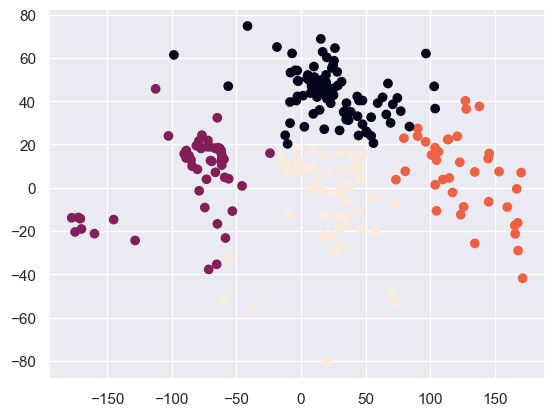

In [32]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'],c= raw_data['ClusterNo'])


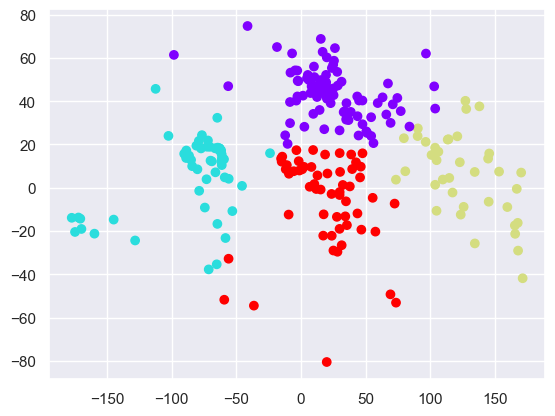

In [33]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'], c=raw_data['ClusterNo'], cmap='rainbow')


In [34]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

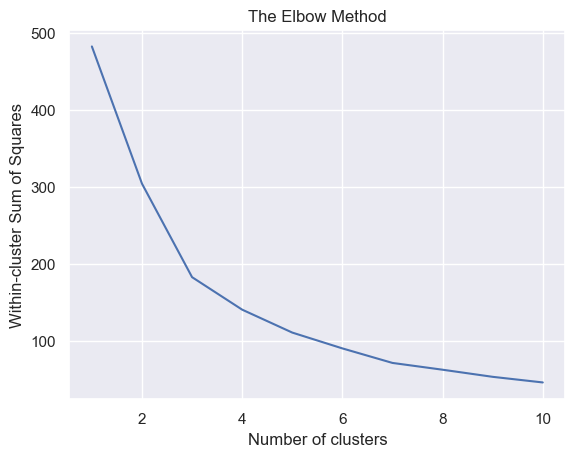

In [36]:
number_clusters = range(1, 11); plt.plot(number_clusters, wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')